# Анализ бизнес-показателей приложения

**Заказчик**: менеджеры проекта **"Procrastinate Pro+"**.

**Цель**: разобраться в причинах убытков компании, разрабатывающей развлекательное приложение **Procrastinate Pro+**, которые возникают последние несколько месяцев работы, несмотря на на огромные вложения в рекламу, а также помочь компании выйти в плюс.

**Предстоит выяснить:**
 - Откуда приходят пользователи и какими устройствами они пользуются;
 - Сколько стоит привлечение пользователей из различных рекламных каналов;
 - Сколько денег приносит каждый клиент;
 - Когда расходы на привлечение клиента окупаются;
 - Какие факторы мешают привлечению клиентов, а также предоставить рекомендации по улучшению результатов отделу маркетинга.

**План проекта**:

 1. Загрузка и обзор данных;
 2. Предобработка;
 3. Формирование функций для расчета метрик и визуализации;
 4. Исследовательский анализ данных;
 5. Формирование профиля клиентов;
 6. Анализ трат на маркетинг;
 7. Оценка окупаемости рекламы;
 8. Вывод по проекту.

## Обзор и предобработка данных

### Загрузка данных

In [1]:
# подключаем библиотеки и загружаем файлы:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
try:
    sessions, orders, ad_costs = (
    pd.read_csv('visits_info_short.csv'),  # журнал сессий
    pd.read_csv('orders_info_short.csv'),  # покупки
    pd.read_csv('costs_info_short.csv'),  # траты на рекламу
    )
except FileNotFoundError:
    sessions, orders, ad_costs = (
    pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv'),  # журнал сессий
    pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),  # покупки
    pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv'),  # траты на рекламу
    )
except Exception:
    print("Some other exception")           

### Вывод общей информации, пропуски, дубликаты

Добавим функцию для вывода общей информации:

In [3]:
# функция для первичного изучения датафреймов:
def information_about_df (df: pd.DataFrame, limit_na_category: int = 10 ) -> None:
    print('Вывод шапки таблицы:')
    display(df.head())
    print('-'*40)
    print('Вывод общей информации:')
    print('')
    print(df.info())
    print('-'*40)
    print('Количество пропусков в данных:')
    print('')
    count = 0
    shape_0 = df.shape[0]
    for element in df.columns:
        if df[element].isna().sum()>0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков, ', round(df[element].isna().sum()*100 / shape_0,2), '% от числа строк.')
            count = +1
        if count == 0:
            print(element,'- пропусков НЕТ')   
    print('-'*40)
    print('Количество дубликатов в данных:')
    print('')
    if df.duplicated().sum() >0:
        print('Дубликатов:', df.duplicated().sum())
    else:
        print('Дубликатов НЕ найдено')

**1. Выведем информацию о файле "sessions":**

In [4]:
information_about_df(sessions)

Вывод шапки таблицы:


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


----------------------------------------
Вывод общей информации:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
----------------------------------------
Количество пропусков в данных:

User Id - пропусков НЕТ
Region - пропусков НЕТ
Device - пропусков НЕТ
Channel - пропусков НЕТ
Session Start - пропусков НЕТ
Session End - пропусков НЕТ
----------------------------------------
Количество дубликатов в данных:

Дубликатов НЕ найдено


Структура файла **"sessions":**

 - **User Id** — уникальный идентификатор пользователя;
 - **Region** — страна пользователя;
 - **Device** — тип устройства пользователя;
 - **Channel** — идентификатор источника перехода;
 - **Session Start** — дата и время начала сессии;
 - **Session End** — дата и время окончания сессии. 

Пропусков и дубликатов нет.

**2. Далее посмотрим файл "orders":**

In [5]:
information_about_df(orders)

Вывод шапки таблицы:


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


----------------------------------------
Вывод общей информации:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
----------------------------------------
Количество пропусков в данных:

User Id - пропусков НЕТ
Event Dt - пропусков НЕТ
Revenue - пропусков НЕТ
----------------------------------------
Количество дубликатов в данных:

Дубликатов НЕ найдено


Структура файла **"orders":**

 - **User Id** — уникальный идентификатор пользователя;
 - **Event Dt** — дата и время покупки;
 - **Revenue** — сумма заказа.

**3. Посмотрим файл "ad_costs":**

In [6]:
information_about_df(orders)

Вывод шапки таблицы:


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


----------------------------------------
Вывод общей информации:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
----------------------------------------
Количество пропусков в данных:

User Id - пропусков НЕТ
Event Dt - пропусков НЕТ
Revenue - пропусков НЕТ
----------------------------------------
Количество дубликатов в данных:

Дубликатов НЕ найдено


Структура файла **"ad_costs":**
    
 - **dt** — дата проведения рекламной кампании;
 - **Channel** — идентификатор рекламного источника;
 - **costs** — расходы на эту кампанию.

Дубликатов и пропусков не обнаружено, останется привести регистр названий столбцов к нижнему и змеиному, а также проверить данные на аномалии и неявные дубликаты в следующих шагах.

### Корректировка регистра и смена форматов данных

Приведем названия колонок во всех файлах к нижнему и змеиному регистрам, а также сменим типы данных в столбцах с датами:

In [7]:
# функция для приведения названий столбцов к змеиному и нижнему регистрам:
def snake_lower_case (df: pd.DataFrame):
    df.columns = [x.lower().replace(' ', '_') for x in df.columns]
    df.columns = df.columns.str.lower()
    
snake_lower_case(sessions)
snake_lower_case(orders)
snake_lower_case(ad_costs)

In [8]:
# сменим типы данных:
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
sessions['session_end'] = pd.to_datetime(sessions['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date 

Данные успешно приведены к нижнему и змеиному регистру, типы данных изменены на нужные.

### Проверка на дубликаты и аномалии

Явных дубликатов при выводе общей информации не было обнаружено. Проверим данные на аномальные значения и неявные дубликаты.

Добавим функцию для рассмотрения данных в колонках датасетов:

In [9]:
def unique_values (df: pd.DataFrame):
     for element in df.columns:
            print(element, ':')
            print('')
            print(df[element].sort_values().unique())
            print('')

1. Датасет "**sessions**":

In [10]:
unique_values(sessions)

user_id :

[      599326      4919697      6085896 ... 999976332130 999979924135
 999999563947]

region :

['France' 'Germany' 'UK' 'United States']

device :

['Android' 'Mac' 'PC' 'iPhone']

channel :

['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds'
 'organic']

session_start :

['2019-05-01T00:00:41.000000000' '2019-05-01T00:01:35.000000000'
 '2019-05-01T00:02:38.000000000' ... '2019-10-31T23:56:54.000000000'
 '2019-10-31T23:58:28.000000000' '2019-10-31T23:59:23.000000000']

session_end :

['2019-05-01T00:07:06.000000000' '2019-05-01T00:17:20.000000000'
 '2019-05-01T00:19:52.000000000' ... '2019-11-01T01:04:04.000000000'
 '2019-11-01T01:07:17.000000000' '2019-11-01T01:38:46.000000000']



Дубликатов нет, аномалий тоже.

2. Датасет "**orders**":

In [11]:
unique_values(orders)

user_id :

[      599326     46006712    374052872 ... 999659859721 999779032958
 999895427370]

event_dt :

['2019-05-01T00:28:11.000000000' '2019-05-01T01:56:28.000000000'
 '2019-05-01T02:02:18.000000000' ... '2019-10-31T23:33:38.000000000'
 '2019-10-31T23:43:41.000000000' '2019-10-31T23:56:56.000000000']

revenue :

[ 4.99  5.99  9.99 19.99 49.99]



Дубликатов нет, аномалий тоже.

3. Датасет "**ad_costs**":

In [12]:
unique_values(ad_costs)

dt :

[datetime.date(2019, 5, 1) datetime.date(2019, 5, 2)
 datetime.date(2019, 5, 3) datetime.date(2019, 5, 4)
 datetime.date(2019, 5, 5) datetime.date(2019, 5, 6)
 datetime.date(2019, 5, 7) datetime.date(2019, 5, 8)
 datetime.date(2019, 5, 9) datetime.date(2019, 5, 10)
 datetime.date(2019, 5, 11) datetime.date(2019, 5, 12)
 datetime.date(2019, 5, 13) datetime.date(2019, 5, 14)
 datetime.date(2019, 5, 15) datetime.date(2019, 5, 16)
 datetime.date(2019, 5, 17) datetime.date(2019, 5, 18)
 datetime.date(2019, 5, 19) datetime.date(2019, 5, 20)
 datetime.date(2019, 5, 21) datetime.date(2019, 5, 22)
 datetime.date(2019, 5, 23) datetime.date(2019, 5, 24)
 datetime.date(2019, 5, 25) datetime.date(2019, 5, 26)
 datetime.date(2019, 5, 27) datetime.date(2019, 5, 28)
 datetime.date(2019, 5, 29) datetime.date(2019, 5, 30)
 datetime.date(2019, 5, 31) datetime.date(2019, 6, 1)
 datetime.date(2019, 6, 2) datetime.date(2019, 6, 3)
 datetime.date(2019, 6, 4) datetime.date(2019, 6, 5)
 datetime.date(201

Тоже ничего аномального.

### Вывод по первой главе

**В первой главе проекта мы проделали следующие шаги:**

 - Загрузили и изучили файлы с данными;
 - Сменили типы данных в столбцах с датами;
 - Привели данные к змеиному регистру;
 - Проверили данные на явные и скрытые дубликаты, а также на аномалии.
 
Данные готовы к дальнейшему анализу.

## Функции для расчёта и анализа LTV, ROI, удержания и конверсии

### Функции для вычисления метрик

#### Функция **get_profiles()** для создания профилей пользователей:

In [13]:
# функция для создания пользовательских профилей:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений:
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло:
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей:
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

   
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения:
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей:
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей:
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили:
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю:
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функция **get_retention()** — для подсчёта Retention Rate:

In [14]:
# функция для расчёта удержания:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список:
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа:
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания:
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам:
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания:
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания:
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные:
    return result_raw, result_grouped, result_in_time 

#### Функция **get_conversion()** — для подсчёта конверсии:

In [15]:
# функция для расчёта конверсии:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа:
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя:
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили:
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки:
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет:
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам:
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate:
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии:
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions:
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии:
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные:
    return result_raw, result_grouped, result_in_time 

#### Функция **get_ltv()** — для подсчёта LTV:

In [16]:
# функция для расчёта LTV и ROI:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа:
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили:
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки:
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет:
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам:
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки:
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением:
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт:
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки:
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты:
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа:
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт:
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions:
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions:
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC:
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI:
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI:
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI:
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа:
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI:
        return result, roi

    # получаем таблицы LTV и ROI:
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions:
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI:
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функции для построения графиков

#### Функция **filter_data()** — для сглаживания данных:

In [17]:
# функция для сглаживания фрейма:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее:
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Функция **plot_retention()** — для построения графика Retention Rate:

In [18]:
# функция для визуализации удержания:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков:
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня:
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort:
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей:
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки:
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы:
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график:
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих:
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график:
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Функция **plot_conversion()** — для построения графика конверсии:

In [19]:
# функция для визуализации конверсии:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков:
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм:
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии:
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии:
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты:
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Функция **plot_ltv_roi** — для визуализации LTV и ROI:

In [20]:
# функция для визуализации LTV и ROI:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков:
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт:
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм:
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм:
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac:
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм:
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv:
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv:
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты:
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac:
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты:
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi:
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi:
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты:
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Вывод по второй главе

**В данной главе мы построили все необходимые для нашего дальнейшего анализа функции:** 

**Функции для вычисления значений метрик:**

 - get_profiles() — для создания профилей пользователей;
 - get_retention() — для подсчёта Retention Rate;
 - get_conversion() — для подсчёта конверсии;
 - get_ltv() — для подсчёта LTV.

**Функции для построения графиков:**

 - filter_data() — для сглаживания данных;
 - plot_retention() — для построения графика Retention Rate;
 - plot_conversion() — для построения графика конверсии;
 - plot_ltv_roi — для визуализации LTV и ROI.
 
Теперь можно переходить непосредственно к анализу данных.

## Исследовательский анализ данных

### Профили пользователей

Получим профили пользователей:

In [21]:
# передаем функции три наших датасета:
profiles = get_profiles(sessions, orders, ad_costs)
profiles.head() 

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Посмотрим в какой диапазон дат привлекались пользователи, найдем минимальную и максимальную дату привлечения:

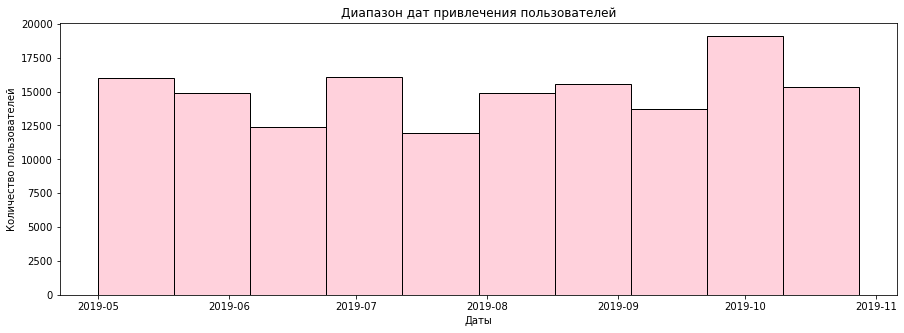

In [22]:
# построим гистограмму:
profiles['first_ts'].hist(figsize = (15, 5), color = '#ffd1dc',  ec='black', grid=False)
plt.title('Диапазон дат привлечения пользователей')
plt.xlabel('Даты')
plt.ylabel('Количество пользователей');

Найдем минимальную дату:

In [23]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

И максимальную дату привлечения пользователей:

In [24]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

Диапазон дат в рассматриваемых данных с 1 мая 2019 года по 27 октября 2019 года. 
В ТЗ к проекту у нас указана дата - 1.11.2019, она на 4 дня отличается от max() даты привлечения пользователей, что может говорить об ощибке в ТЗ или выгрузке данных. Делаем по ТЗ, так как разница небольшая, в реальной работе этот момент было бы необходимо выяснить перед проведением анализа.

Добавим колонку с признаком "платящий" и "неплатящий" клиент, чтобы было удобнее работать с данными не в будевом формате:

In [25]:
def payers_group(payer):
    if payer != True:
         return 'not_payer'
    return 'payer'

#проверяем, корректно ли работает функция:
print(payers_group(False))
print(payers_group(True))

not_payer
payer


Функция работает, добавим новый столбец со значениями:

In [26]:
profiles['payers_group'] = profiles['payer'].apply(payers_group)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,payers_group
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,payer
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,not_payer
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000,not_payer
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,not_payer
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769,not_payer


Теперь мы можем рассмотреть особенности платящих и неплатящих пользователей.

### Распределение пользователей по странам

Посмотрим распределение платящих и неплатящих пользователей по странам:

payers_group,not_payer,payer
region,,
United States,93100,6902
UK,16875,700
France,16787,663
Germany,14365,616


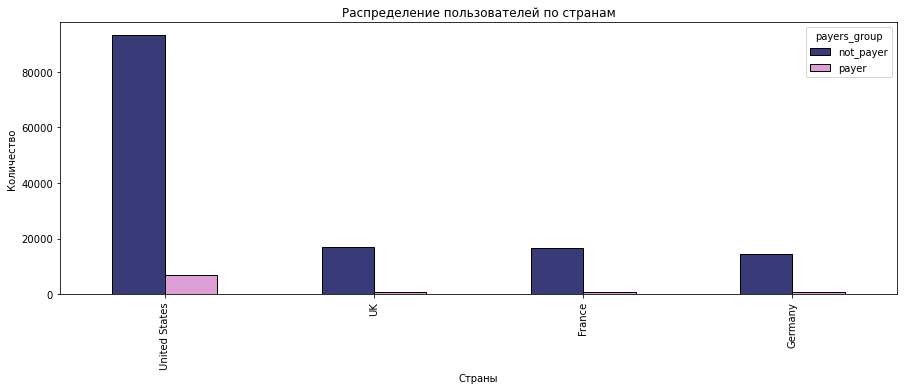

In [27]:
# составим таблицу:
country_table = profiles.pivot_table(index='region', columns='payers_group', values='user_id', 
                                     aggfunc='count').sort_values('payer', ascending = False)
display(country_table)

# построим график для наглядности:
country_table.plot(kind='bar', title='Распределение пользователей по странам', ec='black', 
                   colormap='tab20b', figsize = (15, 5))
plt.xlabel('Страны')
plt.ylabel('Количество');

Рейтинг по убыванию: США, Великобритания, Франция, германия.

Добавим данные о долях платящих и неплатящих пользователей в процентах от общего количества пользователей:

In [28]:
country_table['not_payer, %'] = country_table['not_payer']/(country_table['not_payer'] + country_table['payer'])*100
country_table['payer, %'] = country_table['payer']/(country_table['not_payer'] + country_table['payer'])*100

# поменяем колонки местами для наглядности:
def swap_columns (df, col1, col2):
 col_list = list(df.columns )
 x, y = col_list. index (col1), col_list. index (col2)
 col_list[y], col_list[x] = col_list[x], col_list[y]
 df = df[col_list]
 return df

country_table = swap_columns(country_table, 'payer', 'not_payer, %')
country_table.sort_values('payer, %', ascending = False).round(2)

payers_group,not_payer,"not_payer, %",payer,"payer, %"
region,,,,
United States,93100,93.10,6902,6.90
Germany,14365,95.89,616,4.11
UK,16875,96.02,700,3.98
France,16787,96.20,663,3.80


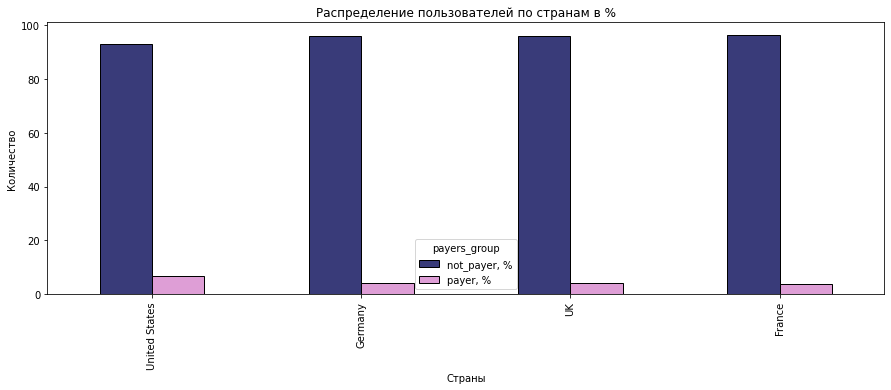

In [29]:
# построим график:
country_table_percent = country_table.drop(
    columns=['not_payer', 'payer'], axis=1).sort_values('payer, %', ascending=False)
country_table_percent.plot(kind='bar', title='Распределение пользователей по странам в %',
                           ec='black', colormap='tab20b', figsize=(15, 5))
plt.xlabel('Страны')
plt.ylabel('Количество');

Как по общему количеству пользователей, количеству платящих пользователей, так и по доле платящих пользователей абсолютный лидер - США.  Далее по долям плятящих покупателей распологаются: Германия, Великобритания, Франция.

### Распределение пользователей по устройствам

Узнаем какие устройства предпочитают платящие пользователи:

payers_group,not_payer,payer
device,,
iPhone,51097,3382
Android,32982,2050
Mac,28130,1912
PC,28918,1537


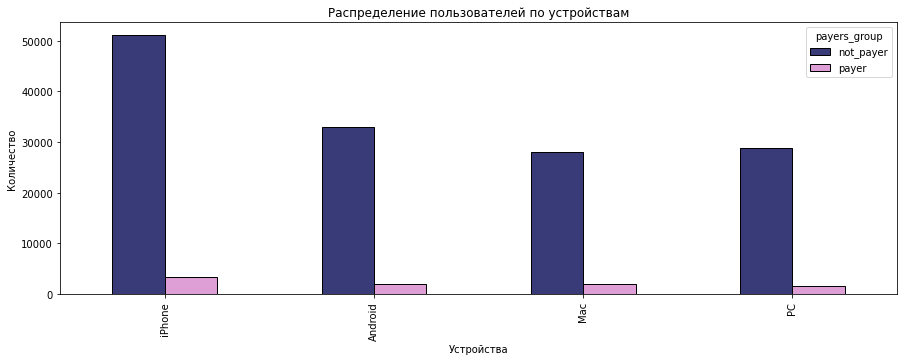

In [30]:
# строим таблицу:
device_table = profiles.pivot_table(index='device', columns='payers_group',
                                    values='user_id', aggfunc='count').sort_values('payer', ascending=False)
display(device_table)

# построим график для наглядности:
device_table.plot(kind='bar', title='Распределение пользователей по устройствам',
                  ec='black', colormap='tab20b', figsize=(15, 5))
plt.xlabel('Устройства')
plt.ylabel('Количество');

В количественном выражении лидер - айфоны, далее идут андройд, мак и прочие пк.

Добавим данные о проценте платящих пользователей для каждого устройтсва.

In [31]:
device_table['payer, %'] = device_table['payer']/(device_table['payer'] + device_table['not_payer'])*100
device_table.sort_values('payer, %', ascending = False).round(2)

payers_group,not_payer,payer,"payer, %"
device,,,
Mac,28130,1912,6.36
iPhone,51097,3382,6.21
Android,32982,2050,5.85
PC,28918,1537,5.05


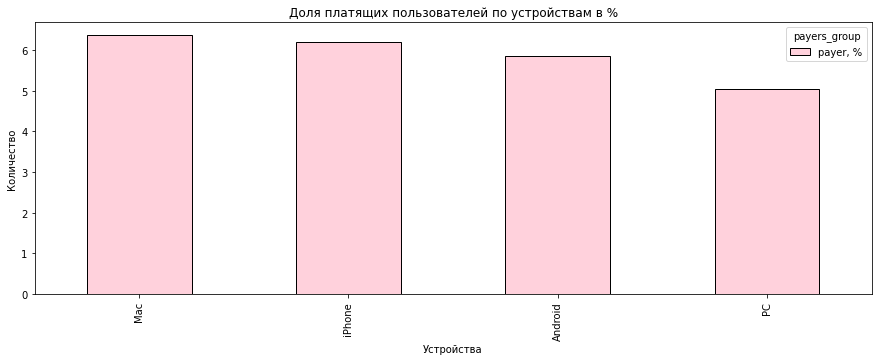

In [32]:
# построим график:
device_table_percent = device_table.drop(
    columns=['not_payer', 'payer'], axis=1).sort_values('payer, %', ascending=False)
device_table_percent.plot(kind='bar', title='Доля платящих пользователей по устройствам в %',
                          ec='black', color='#ffd1dc', figsize=(15, 5))
plt.xlabel('Устройства')
plt.ylabel('Количество');

Если же смотреть в долях платящих пользователей от общего количества, то на первое место выходят пользователи мака, затем айфонов, андройдов и пк.

### Распределение пользователей по каналам привлечения

Изучим источники привлечения пользователей:

payers_group,not_payer,payer
channel,,
FaceBoom,25587,3557
TipTop,17683,1878
organic,55279,1160
WahooNetBanner,8100,453
AdNonSense,3440,440
RocketSuperAds,4096,352
LeapBob,8291,262
OppleCreativeMedia,8372,233
lambdaMediaAds,1924,225


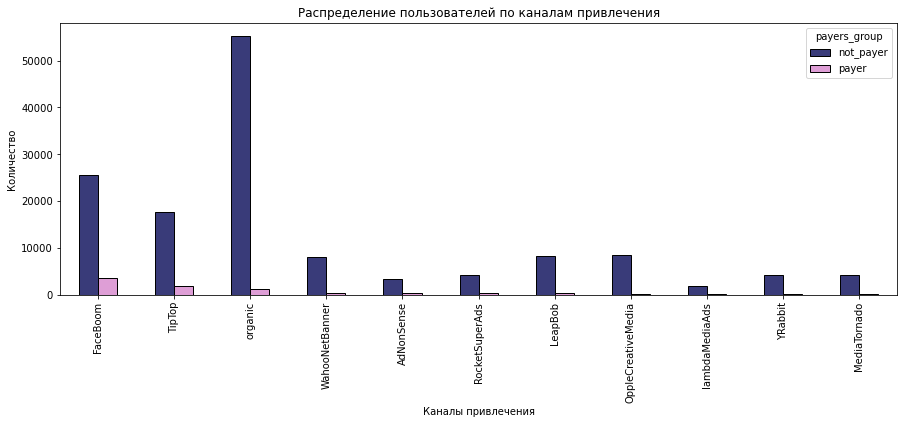

In [33]:
# строим таблицу:
channel_table = profiles.pivot_table(index='channel', columns='payers_group',
                                     values='user_id', aggfunc='count').sort_values('payer', ascending=False)
display(channel_table)

# построим график для наглядности:
channel_table.plot(kind='bar', title='Распределение пользователей по каналам привлечения',
                   ec='black', colormap='tab20b', figsize=(15, 5))
plt.xlabel('Каналы привлечения')
plt.ylabel('Количество');

В тройке лидеров Фейсбум, ТипТоп и органический трафик.

Посмотрим как обстоит дело в процентном выражении:

In [34]:
# добавим столбец с долей в процентах:
channel_table['payer, %'] = channel_table['payer']/(channel_table['payer'] + channel_table['not_payer'])*100
channel_table.sort_values('payer, %', ascending = False).round(2)

payers_group,not_payer,payer,"payer, %"
channel,,,
FaceBoom,25587,3557,12.20
AdNonSense,3440,440,11.34
lambdaMediaAds,1924,225,10.47
TipTop,17683,1878,9.60
RocketSuperAds,4096,352,7.91
WahooNetBanner,8100,453,5.30
YRabbit,4147,165,3.83
MediaTornado,4208,156,3.57
LeapBob,8291,262,3.06


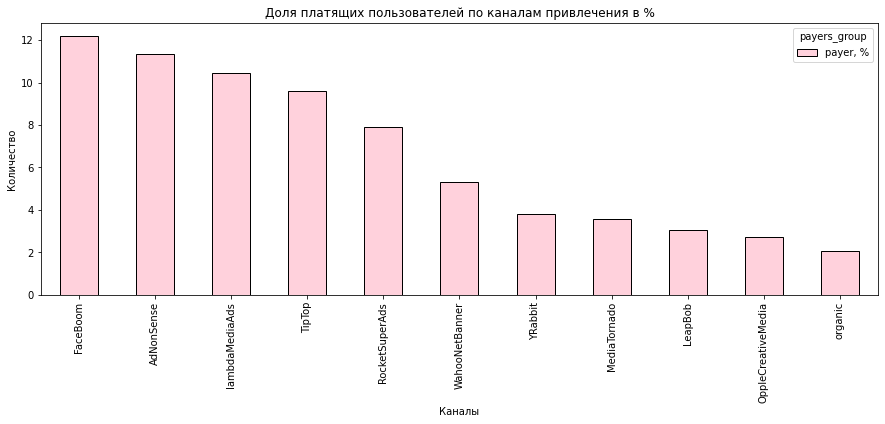

In [35]:
# построим график:
channel_table_percent = channel_table.drop(columns = ['not_payer', 'payer'], 
                                           axis = 1).sort_values('payer, %', ascending = False)
channel_table_percent.plot(kind='bar', title='Доля платящих пользователей по каналам привлечения в %', 
                           ec='black', color='#ffd1dc', 
                           figsize = (15, 5))
plt.xlabel('Каналы')
plt.ylabel('Количество');

Лидер остается тем же - Фейсбум, а далее уже другие каналы - ЭдНонСенс и ЛамбдаМедиаЭдс. Органический трафик занимает последнее место в рейтинге. 

### Вывод по третьей главе

**В данной главе мы проделали следующие шаги:**

 - Получили профили пользователей с помощью функции get_profiles();
 
 - Узнали размер рассматриваемого периода: с 1 мая 2019 года по 27 октября 2019 года;
 
 - Рассмотрели распределение платящих пользователей по странам (В количественном выражении по убыванию: США, Великобритания, Франция, германия. В проценте от общего количества пользователей: США, Германия, Великобритания, Франция);
 
 - Рассмотрели распределение плятящих пользователей по устройствам (В количественном выражении по убыванию: айфоны, далее идут андройд, мак и прочие пк. В проценте от общего количества пользователей:  мак, затем айфоны, андройд и пк);
 
 - Рассмотрели распределение пользователей по каналам привлечения (Количественно в тройке лидеров: Фейсбум, ТипТоп и органический трафик. В процентах: Фейсбум, ЭдНонСенс и ЛамбдаМедиаЭдс. Органический трафик занимает последнее место в рейтинге).

## Маркетинг

### Структура трат на маркетинг

Посчитаем общую сумму расходов на маркетинг:

In [36]:
print('Общие траты на рекламу:', ad_costs['costs'].sum().round(2))

Общие траты на рекламу: 105497.3


Посмотрим как траты распределены по рекламным источникам:

,sum_costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


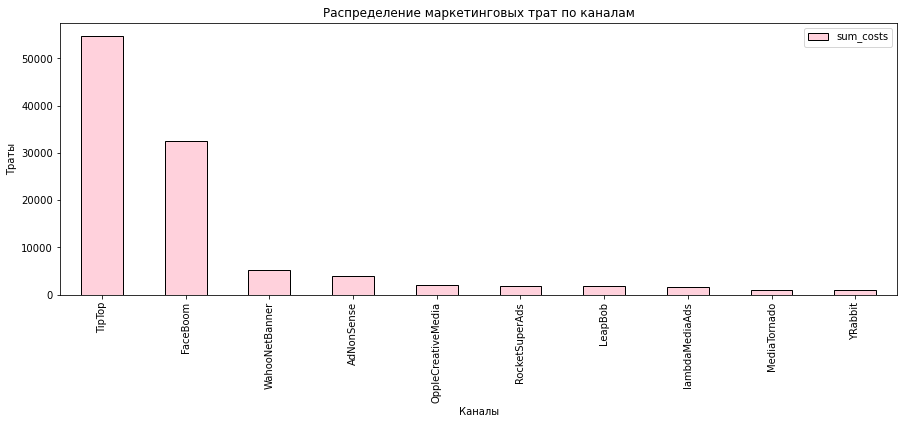

In [37]:
# построим сводную таблицу по каналам:
ad_costs_channel_table = ad_costs.pivot_table(index='channel', values = 'costs', aggfunc = 'sum')
ad_costs_channel_table.columns = ['sum_costs']
ad_costs_channel_table = ad_costs_channel_table.sort_values('sum_costs', ascending = False)
display(ad_costs_channel_table)

# построим график для наглядности:
ad_costs_channel_table.plot(kind='bar', title='Распределение маркетинговых трат по каналам', 
                            ec='black', figsize = (15, 5), color = '#ffd1dc')
plt.xlabel('Каналы')
plt.ylabel('Траты');

В лидерах по тратам - ТипТоп, ФейсБум, ВахуНетБаннер и ЭдНонСенс. При этом траты на первые два превышает траты на все остальные источники, основной упор в маркетинге делался на них.


### Динамика трат на маркетинг

Далее рассмотрим динамику трат на маркетинг по месяцам и неделям.
Из дат рекламных кампаний выделим номера месяцев и недель, составим по ним сводные таблицы.

In [38]:
# добавим столбцы с номером недели и месяца в датафрейм ad_costs:
ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
ad_costs['week'] = ad_costs['dt'].dt.isocalendar().week
ad_costs['month'] = ad_costs['dt'].dt.month

# сделаем сводную таблицу по месяцам:
ad_costs_pivot_month = ad_costs.pivot_table(index='month',columns = 'channel', values='costs', aggfunc='sum', fill_value='-')
display(ad_costs_pivot_month.head(3))

# сделаем сводную таблицу по неделям:
ad_costs_pivot_week = ad_costs.pivot_table(index='week',columns = 'channel', values='costs', aggfunc='sum', fill_value='-')
display(ad_costs_pivot_week.head(3))

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2


channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.0,99.45,347.0,49.2,52.2,81.6
19,273.00,750.2,31.71,61.68,34.5,139.23,470.0,92.4,75.9,103.2
20,265.65,755.7,26.67,59.04,27.5,138.06,454.0,90.0,69.3,90.4


Сводные таблицы готовы, построим графики и тепловые карты для наглядности динамики:

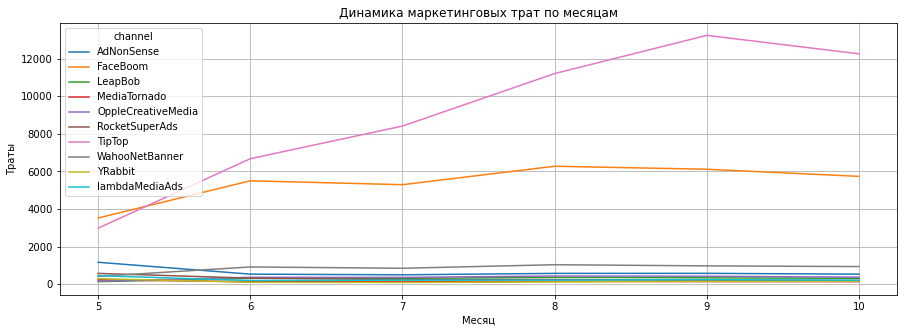

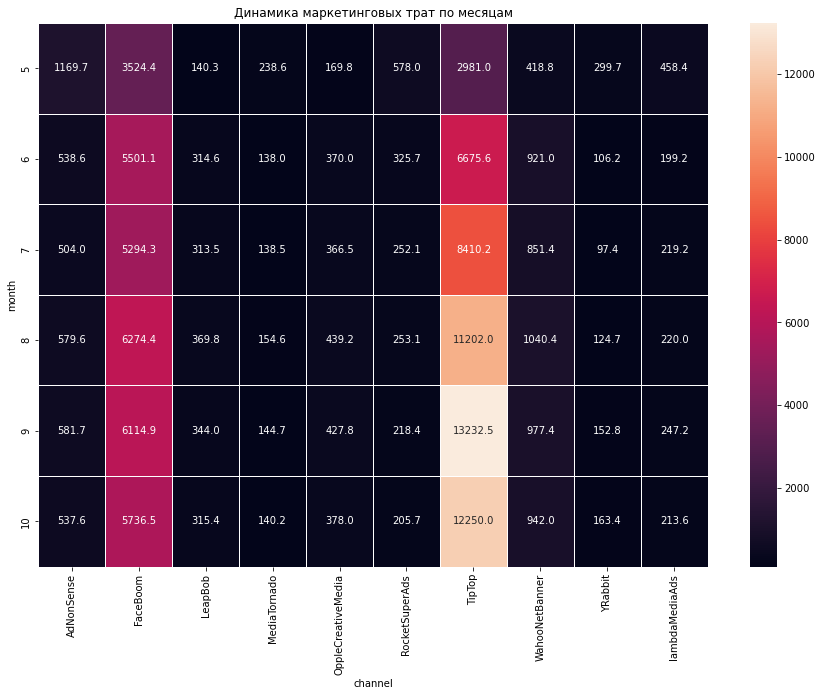

In [39]:
# график динамики по месяцам:
ad_costs_pivot_month.plot(grid=True, figsize=(15, 5))
plt.xlabel('Месяц')
plt.ylabel('Траты')
plt.title('Динамика маркетинговых трат по месяцам')
plt.show()

# тепловая карта динамики по месяцам:
plt.figure(figsize=(15,10))
sns.heatmap(ad_costs_pivot_month, annot=True, fmt=".1f",linewidth=.5)
plt.title('Динамика маркетинговых трат по месяцам')
plt.show()

По графикам можно увидеть, что два лидера трат ТипТоп и Фейсбум не только сильно опережают остальных по уровню трат, но и показывают рост этих самых трат из месяца в месяц. 

Пик трат на ТипТоп - сентябрь, на втором месте - октябрь, на третьем - август. 
Пик трат на Фейсбум - август, на втором месте - сентябрь, на третьем - октябрь. 

Что касается остальных каналов, то уровень трат по месяцам у них низкий и всегда примерно на одном уровне.

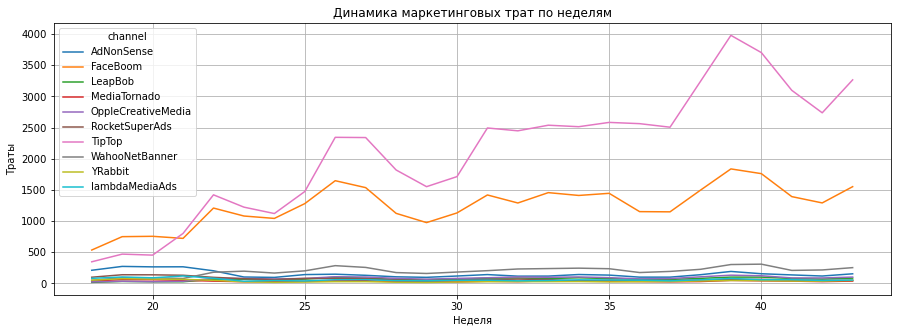

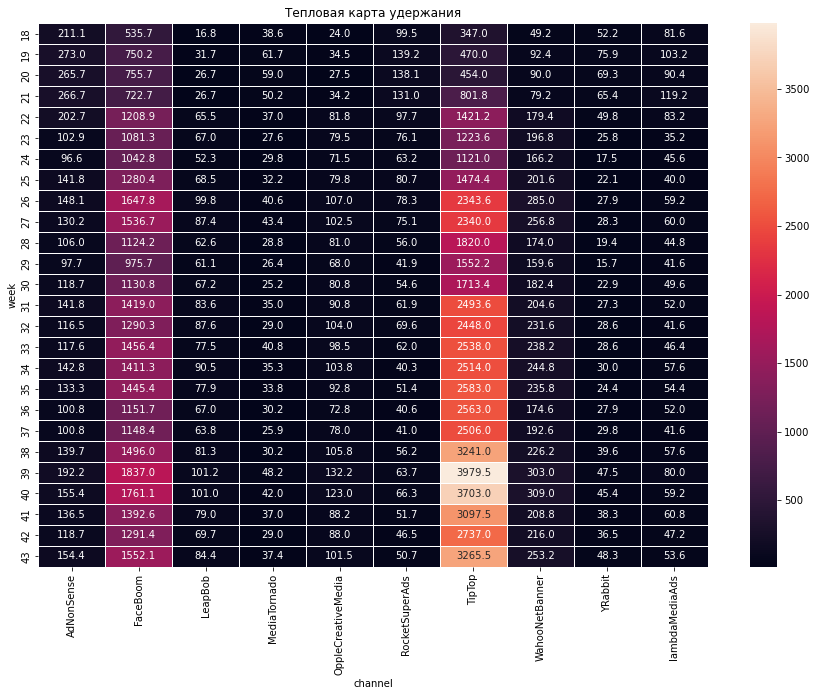

In [40]:
# график динамики по неделям:
ad_costs_pivot_week.plot(grid=True, figsize=(15, 5))
plt.xlabel('Неделя')
plt.ylabel('Траты')
plt.title('Динамика маркетинговых трат по неделям')
plt.show()

# тепловая карта динамики по неделям:
plt.figure(figsize=(15, 10))
sns.heatmap(ad_costs_pivot_week, annot=True, fmt=".1f",linewidth=.5)
plt.title('Тепловая карта удержания')
plt.show()

По неделям ситуация схожая. Лидеры трат - ТипТоп и Фейсбум. 

Пик трат на ТипТоп - 39 неделя.
Пик трат на Фейсбум - также 39 неделя. 

Что касается остальных каналов, то уровень трат по неделям у них также низкий и всегда примерно на одном уровне.

### Стоимость привлечения клиентов

Выясним сколько, в среднем, стоило привлечение одного клиента (САС):

In [41]:
сас_profiles = profiles['acquisition_cost'].mean()
print('Средняя стоимость привлечения одного клиента:', сас_profiles)

Средняя стоимость привлечения одного клиента: 0.7032778251827625


Рассмотрим как средняя стоимость привлечения меняется в зависимости от источника привлечения:

,acquisition_cost
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


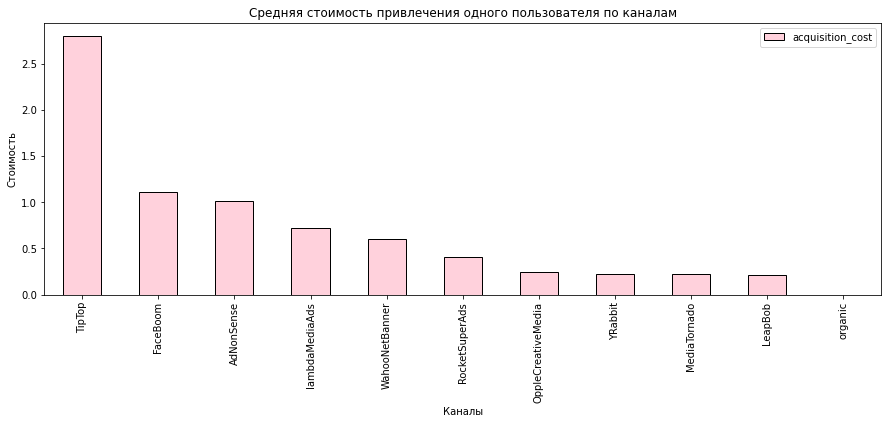

In [42]:
# сгруппируем данные в таблицу:
cac_by_chanels = profiles.pivot_table(index='channel', 
                                      values='acquisition_cost', aggfunc='mean', 
                                      fill_value='-').sort_values('acquisition_cost', ascending = False).round(2)
display(cac_by_chanels)

# выведем график для наглядности:
cac_by_chanels.plot(kind='bar', title='Средняя стоимость привлечения одного пользователя по каналам', 
                    ec='black', figsize = (15, 5), color = '#ffd1dc')
plt.xlabel('Каналы')
plt.ylabel('Стоимость');

Лидер по размеру САС - ТипТоп - 2.8 за привлечение одного человека. На втором месте - Фейсбум - 1.11, на третьем - ЭдНонСенс - 1.

### Выводы по четвертой главе

**В этой главе были пройдены следующие шаги:**

 - Посчитаны общие траты на рекламу: 105497.3;
 - Рассмотрена структура трат на рекламу (в лидерах по тратам - ТипТоп, ФейсБум, ВахуНетБаннер и ЭдНонСенс. При этом траты на первые два превышает траты на все остальные источники, основной упор в маркетинге делался на них);
 - Изучена динамика трат на маркетинг в рассматриваемом периоде (два лидера трат ТипТоп и Фейсбум не только сильно опережают остальных по уровню трат, но и показывают рост этих самых трат из месяца в месяц);
 - Посчитана средняя стоимость привлечения одного пользователя: 0.7;
 - Рассмотрена средняя стоимость привлечения клиентов в разрезе каналов привлечения (лидер по размеру САС - ТипТоп - 2.8 за привлечение одного человека. На втором месте - Фейсбум - 1.11, на третьем - ЭдНонСенс - 1). 

Далее мы переходим к оценке окупаемости рекламы.

## Оценка окупаемости рекламы

### LTV и ROI

Зададим момент и горизонт анализа. По условию у нас на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

In [43]:
# задаем дату наблюдения и горизонт:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

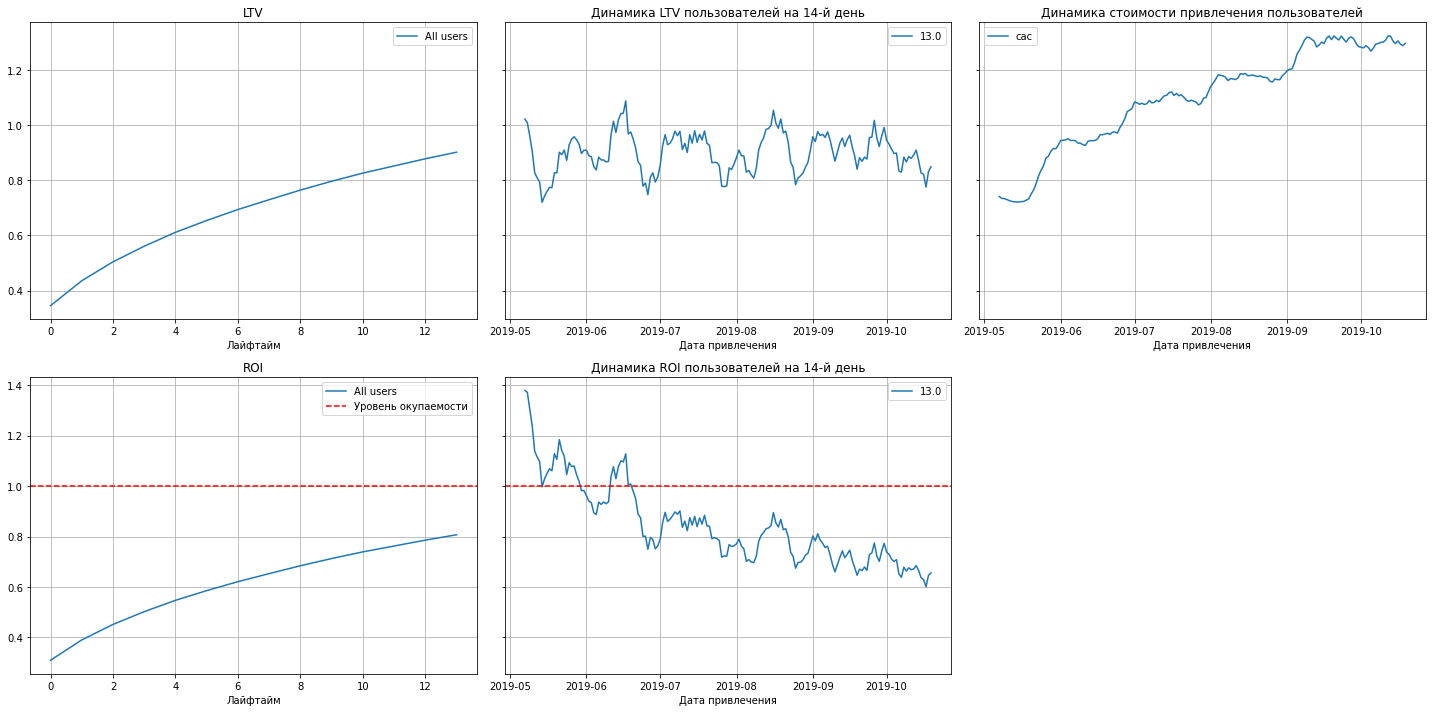

In [44]:
# считаем LTV и ROI, исключив органику:
profiles = profiles.query('channel != "organic"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
# строим графики:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**По графикам мы видим, что:**

 - Реклама не окупается, даже к 14 дню ROI не приближается к 100% и не пересекает уровень окупаемости;
 - САС растет, вслед за ним и ROI, но с увеличением расходов окупаемость так и не достигнута;
 - LTV стабильный, проблема не в качестве пользователей.
 
 Чтобы понять где проблема, нам нужно рассмотреть окупаемость по устройствам, регионам, посмотреть конверсию и удержание.

### Окупаемость в разбивке по регионам

 Посмотрим в разбивке по регионам:

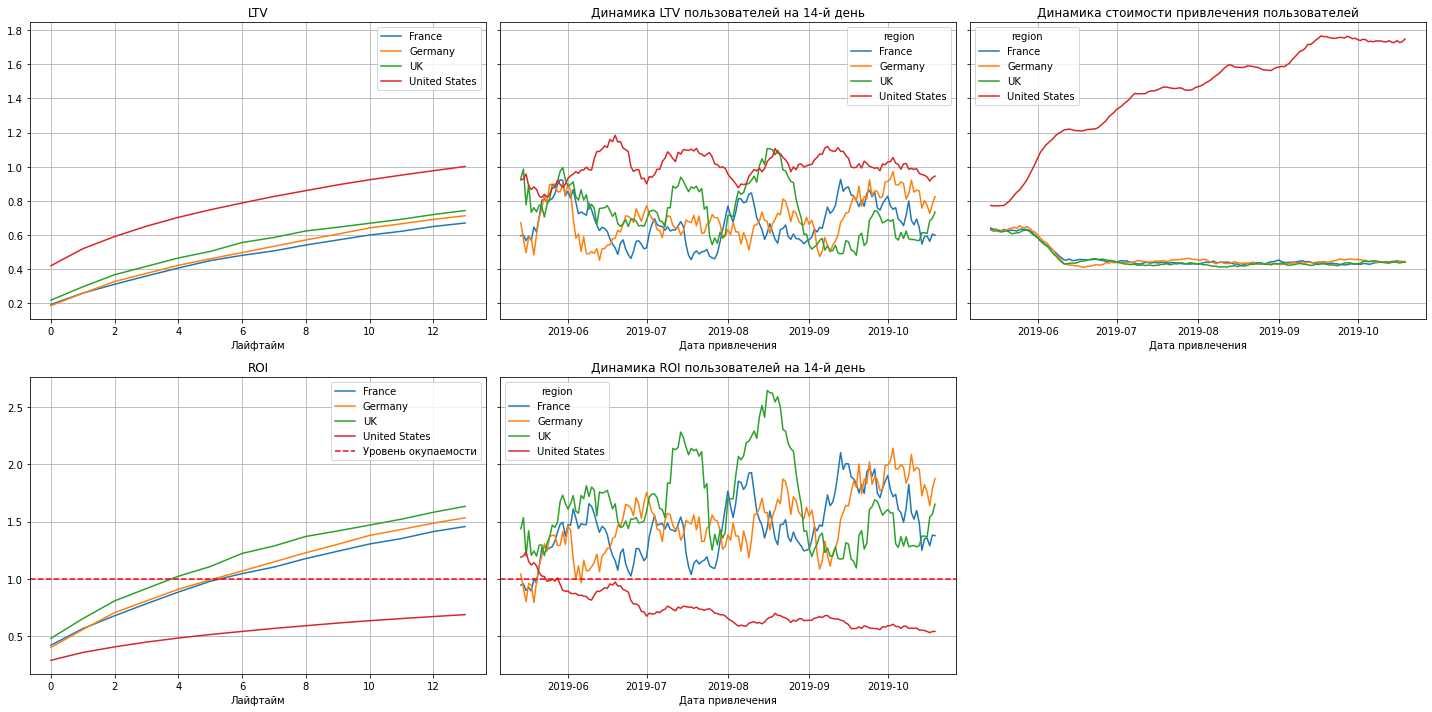

In [45]:
# смотрим окупаемость с разбивкой по странам:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Что мы видим:**

 - LTV стабильно растет по всем странам, у США выше всего;
 - Динамика LTV стабильна;
 - Динамика САС у европейских стран стабильна, а вот по США затраты в разы увеличились;
 - Лидер по окупаемости - Великобритания, затем идет Германия, Франция. США - не окупается;
 - Окупаемости на 2-6 день достигли все регионы, кроме США, у которого несмотря на увеличение затрат и высокий LTV уровень окупаемости не привысил 70% к 14 дню;
 - Динамика ROI стабильно выше оуровня окупаемости у европейский стран, а вот у США наблюдается резкое падение с начала наблюдения, в первой декаде июня ROY упал ниже уровня окупаемости и продолжает постепенно снижаться дальше.
 
 Наша проблема кроется в США.
 
 Посмотрим, что у нас по конверсии:

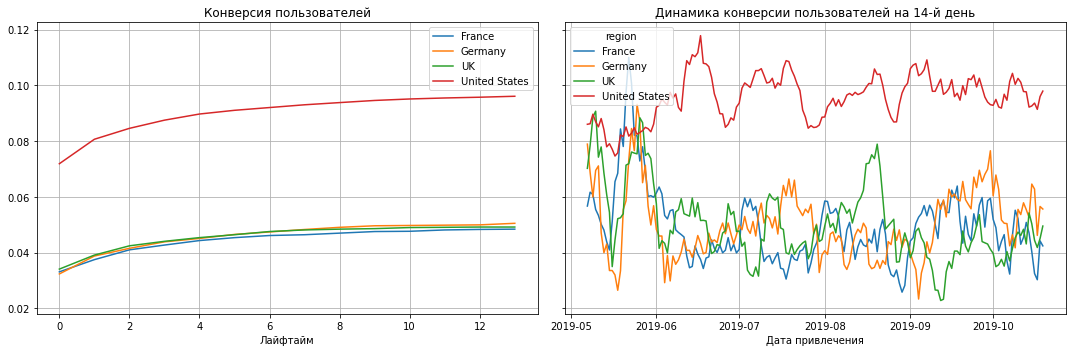

In [46]:
# смотрим конверсию с разбивкой по регионам:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

С конверсией пользователей все стабильно, США конверсируется лучше всех.

Рассмотрим удержание пользователей:

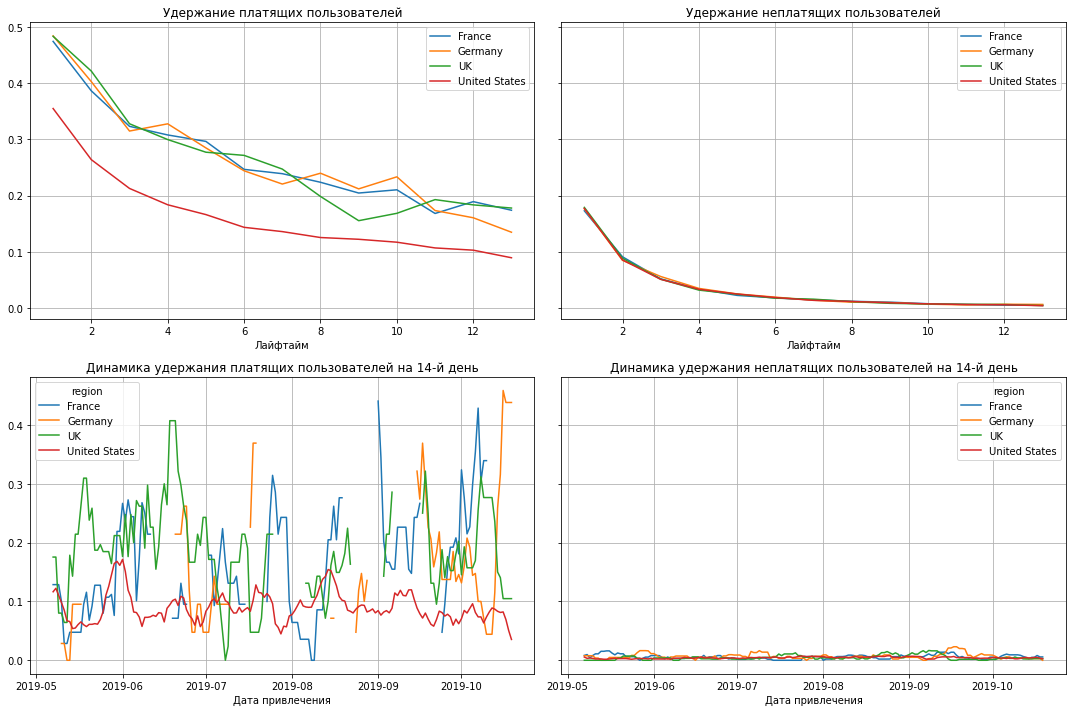

In [47]:
# смотрим удержание с разбивкой по регионам:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Все тоже достаточно стабильно. США чуть хуже удерживает пользователей, чем остальные регионы.

Так как проблема имеет региональный характер, есть подозрение, что дело в каких-то отдельных каналах привлечения, которые есть в США, но отсутствуют в Европе. Проверим это далее.

### Окупаемость в разбивке по каналам привлечения

 Посмотрим, что у нас по источникам привлечения:

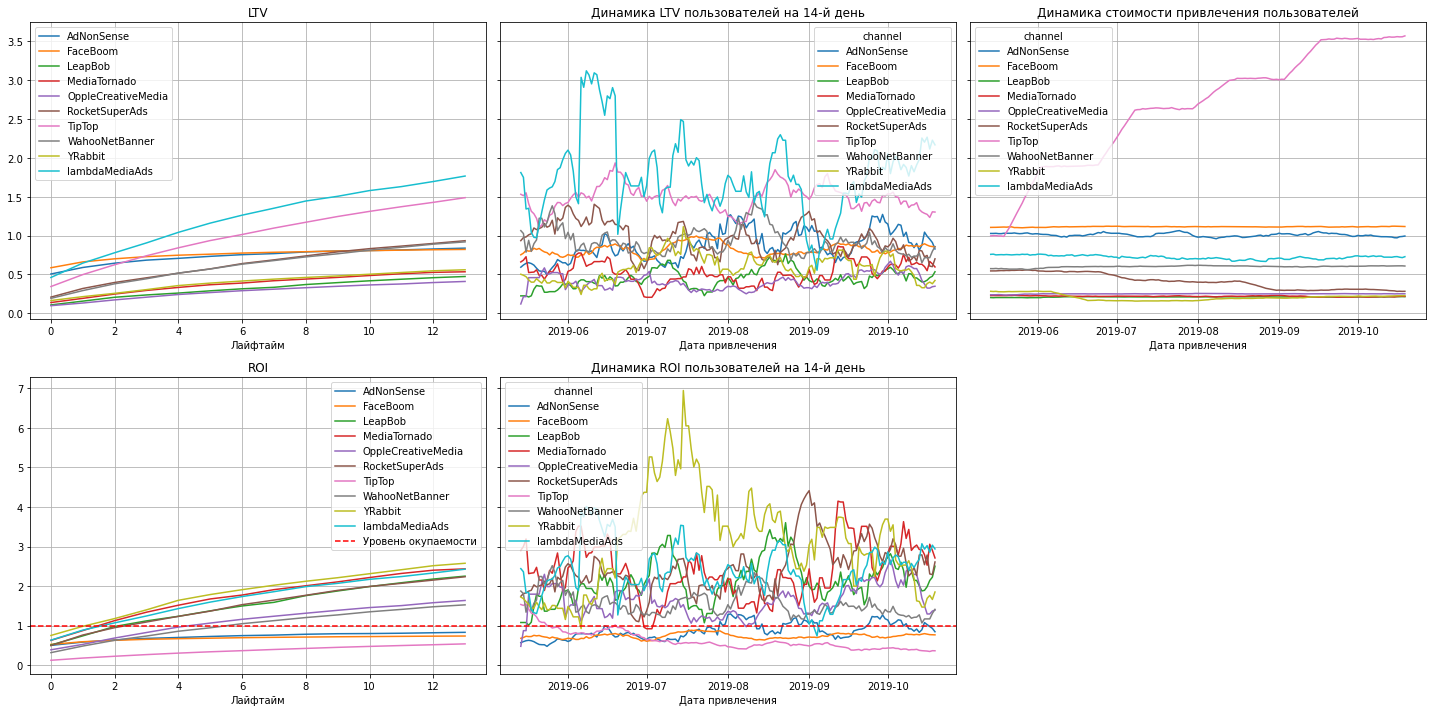

In [48]:
# смотрим окупаемость с разбивкой по источникам привлечения:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам мы можем увидеть, что:

 - LTV стабильно растет, наиболее высокие значения у ЛамбдаМедиаЭдс;
 - Динамика LTV имеет легкую сезонность, самые большие перепады у ЛамбдаМедиаЭдс, но в целом, все стабильно;
 - Динамика САС стабильная у всех источников, кроме ТипТоп, по нему стоимость привлечения резко возросла с начала периода;
 - При этом, мы видим три источника, затраты по которым не окупаются: ТипТоп, ФейсБум, ЭднонСенс;
 - Несмотря на самые высокие траты на привлечение, ТипТоп показывает самый низкий уровень ROI.

Посмотрим какие каналы присутсвуют в **США:**

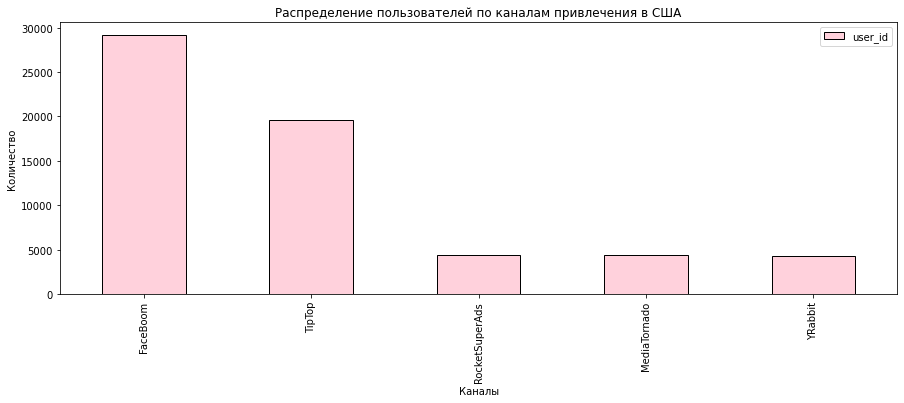

In [49]:
# Отберем данные по США и сделаем сводную таблицу по источникам привлечения:
profiles_USA = profiles[profiles['region'] == 'United States']
profiles_USA_table =  profiles_USA.pivot_table(index='channel', values='user_id', 
                                               aggfunc='count').sort_values('user_id', ascending = False)

# построим график для наглядности:
profiles_USA_table.plot(kind='bar', title='Распределение пользователей по каналам привлечения в США', 
                        ec='black', color='#ffd1dc', figsize = (15, 5))
plt.xlabel('Каналы')
plt.ylabel('Количество');

В лидерах видим два из трех лидеров по неокупаемости - Фейсбум и ТипТоп. Пользователей приходит много, но затрат на рекламу эти два источника не окупают. А вот ЭдНонСенс в списке нет, вероятно это европейский канал привлечения. Построим такое же распределение по Германии, Франции и Великобритании.

**Германия:**

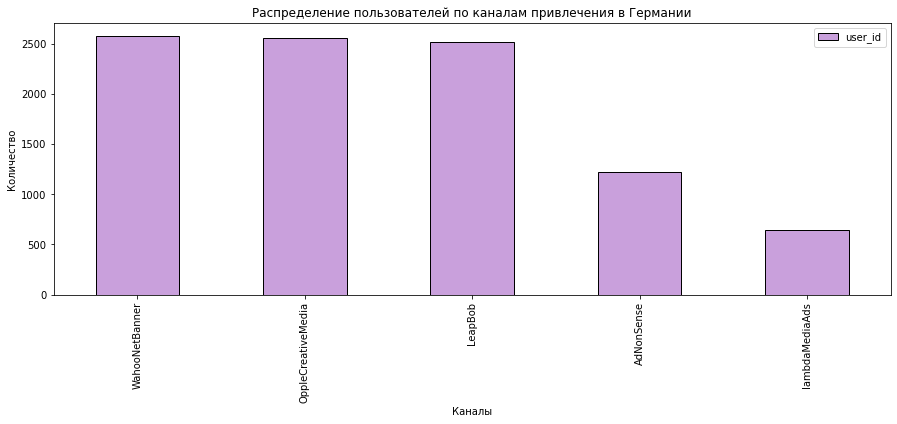

In [50]:
# Отберем данные по Германии и сделаем сводную таблицу по источникам привлечения:
profiles_Germany = profiles[profiles['region'] == 'Germany']
profiles_Germany_table =  profiles_Germany.pivot_table(index='channel', 
                                                       values='user_id', aggfunc='count').sort_values('user_id', 
                                                                                                      ascending = False)

# построим график для наглядности:
profiles_Germany_table.plot(kind='bar', title='Распределение пользователей по каналам привлечения в Германии', 
                            ec='black', color='#c9a0dc', figsize = (15, 5))
plt.xlabel('Каналы')
plt.ylabel('Количество');

**Великобритания:**

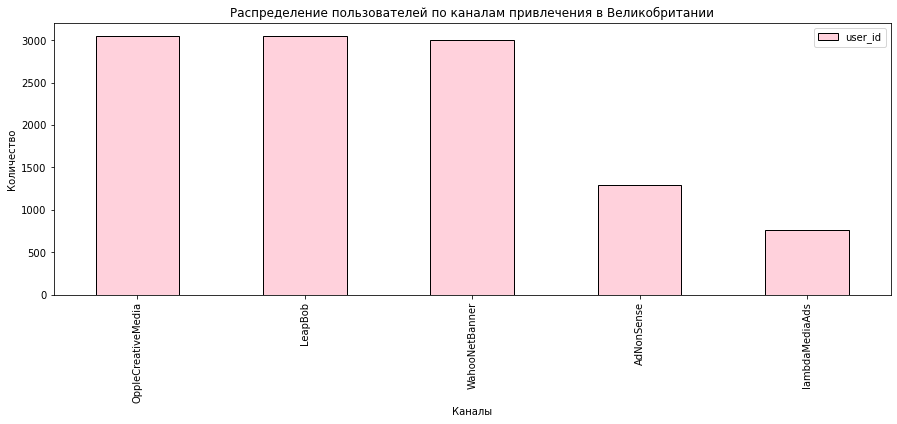

In [51]:
# Отберем данные по Великобритании и сделаем сводную таблицу по источникам привлечения:
profiles_UK = profiles[profiles['region'] == 'UK']
profiles_UK_table =  profiles_UK.pivot_table(index='channel', values='user_id', 
                                             aggfunc='count').sort_values('user_id', ascending = False)

# построим график для наглядности:
profiles_UK_table.plot(kind='bar', title='Распределение пользователей по каналам привлечения в Великобритании', 
                       ec='black', figsize = (15, 5), color = '#ffd1dc')
plt.xlabel('Каналы')
plt.ylabel('Количество');

**Франция:**

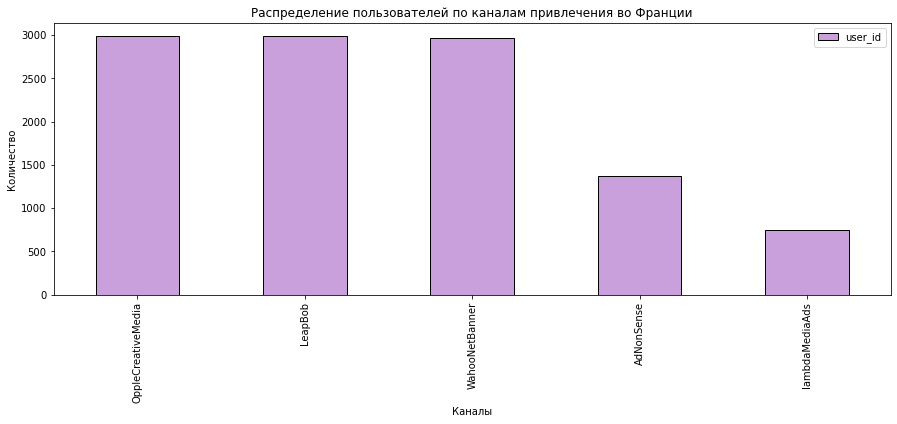

In [52]:
# Отберем данные по Франции и сделаем сводную таблицу по источникам привлечения:
profiles_France = profiles[profiles['region'] == 'France']
profiles_France_table =  profiles_France.pivot_table(index='channel', values='user_id', 
                                                     aggfunc='count').sort_values('user_id', ascending = False)

# построим график для наглядности:
profiles_France_table.plot(kind='bar', title='Распределение пользователей по каналам привлечения во Франции', 
                           ec='black', figsize = (15, 5), color = '#c9a0dc')
plt.xlabel('Каналы')
plt.ylabel('Количество');

Так и есть, канал присутсвует во всех трех европейских странах.

**По графикам мы можем понять, что:**

 - Главная проблема - это окупаемость ТипТоп. Это второй по величине источник привлечения в США и траты на него, в отличии от остальных источников, сильно выросли за рассматриваемый период. Больше всего потерь тут;
 
 - Вторая проблема - ФейсБум. Это первый по величине канал привлечения в США, он также не окупается. Но в отличии от ТипТопа, затраты на него за рассматриваемый период стабильны и не увеличиваются, хотя находятся на достаточно высоком уровне, обгоняет только ТипТоп;
 
 - Третья проблема находится в Европе - ЭдНонСенс. Этот канал в США отсутсвует, но присутствует во всех трех европейских странах. Он также не окупается, при этом еще и не приносит много пользователей, в рейтинге привлечения всех трех стран он на предпоследнем месте. Так как европейская аудитория небольшая по сравнению с США, а траты на привлчение через этот канал относительно не большие, этот канал не оказывает такого сильного влияния на общую окупаемость, как первые два, что подтверждает общий график окупаемости по странам.

И напоследок посмотрим коверсию в разбивке по каналам:

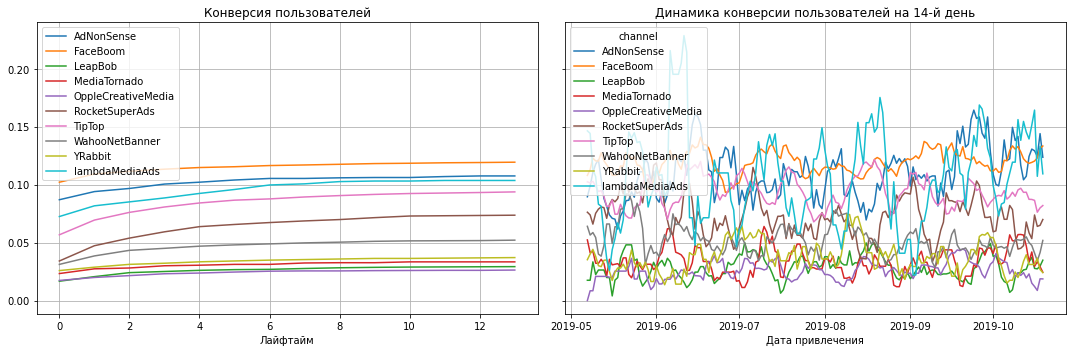

In [53]:
# смотрим конверсию с разбивкой по каналам:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Показатели стабильные, лучше всего конверсия у ФейсБум, что не спасает его окупаемость. Худшие у ЩплКреативМедиа. Проблема не в конверсии.

### Окупаемость в разбивке по устройствам

Посмотрим как обстоят дела с устройствами:

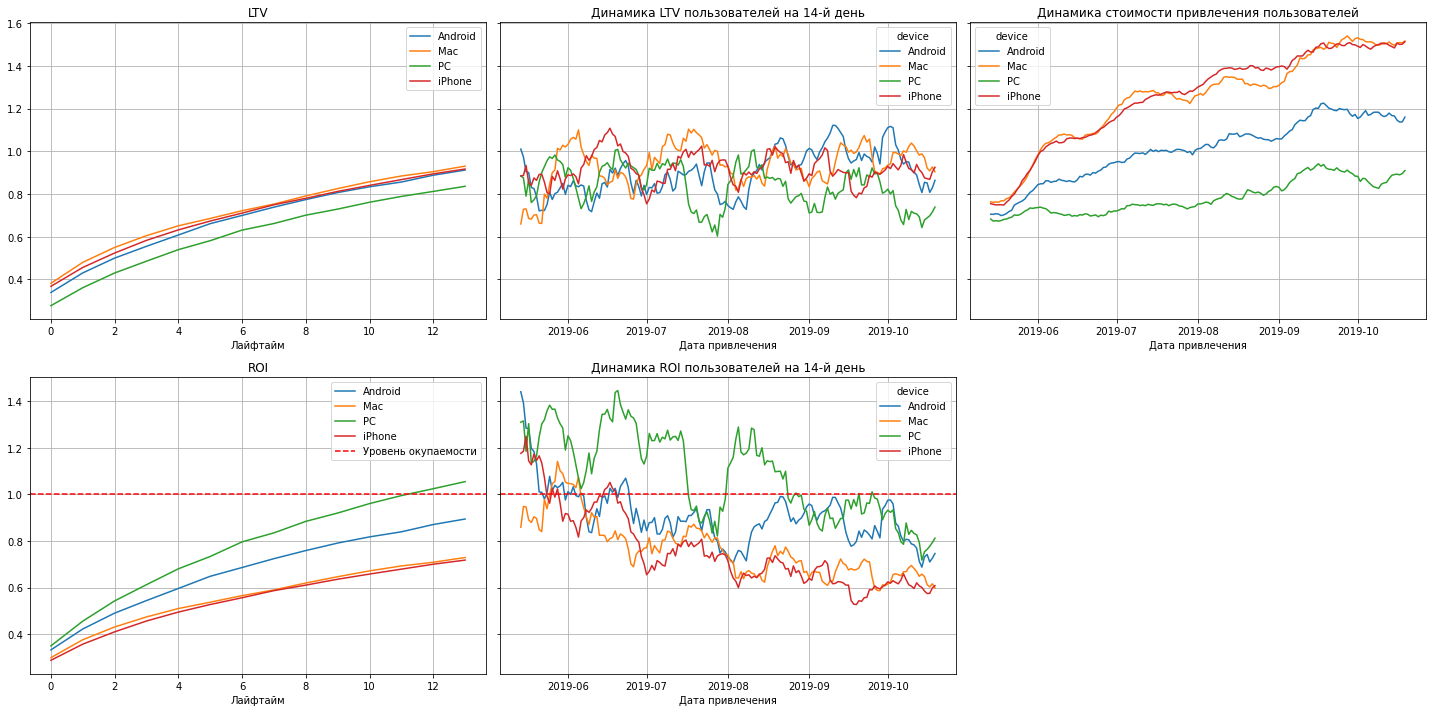

In [54]:
# смотрим окупаемость с разбивкой по устройствам:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**По графикам мы видим, что:**

 - Окупаются только пользователи ПК;
 - В динамике окупаемости также видно, что проблема с окупаемостью есть у всех устройств, кроме ПК.
 
 Посмотрим конверсию по устройствам:

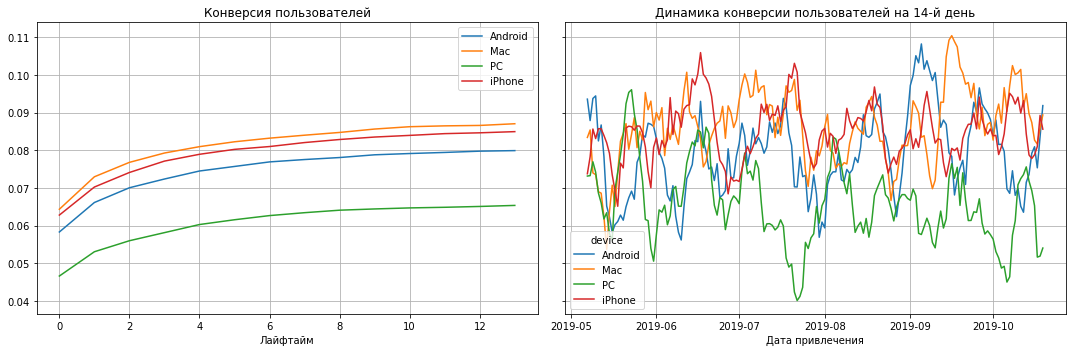

In [55]:
# смотрим конверсию с разбивкой по устройствам:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Показатели по конверсии стабильны. Лучше всего показатель у пользователей Маков, хуже всего у ПК, хотя окупается он лучше всех. 

Рассмотрим удержание:

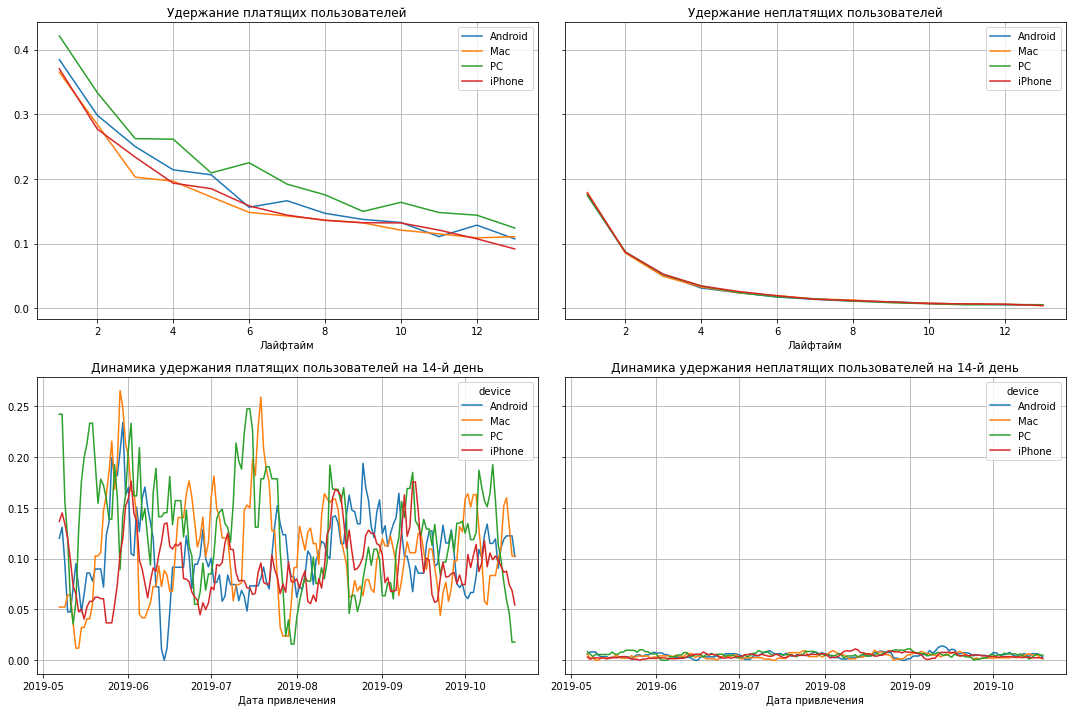

In [56]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Тут все ровно по всем устройствам. 

Проблем с конверсией и удержанием нет, но пользователи устройств, кроме ПК не окупаются. Причина в чем-то другом. Возможно дело в завышенных затратах на привлечение пользователей этих устройств или же в каких-то технических причинах, связанных именно с этими устройствами, которых нет на ПК.

Посмотрим региональные предпочтения по девайсам, есть предположение, что Айфонами и Маками пользуются по большей части с США и это может быть вторым фактором влияющим на региональную проблему.

**США:**

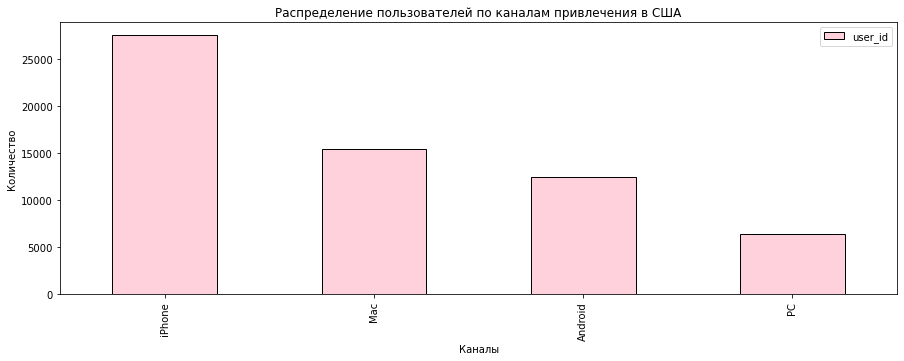

In [57]:
# Отберем данные по США и сделаем сводную таблицу по источникам привлечения:
profiles_USA_device = profiles[profiles['region'] == 'United States']
profiles_USA_device_table =  profiles_USA_device.pivot_table(index='device', values='user_id', 
                                                             aggfunc='count').sort_values('user_id', ascending = False)

# построим график для наглядности:
profiles_USA_device_table.plot(kind='bar', title='Распределение пользователей по каналам привлечения в США', 
                               ec='black', figsize = (15, 5), color = '#ffd1dc')
plt.xlabel('Каналы')
plt.ylabel('Количество');

**Германия:**

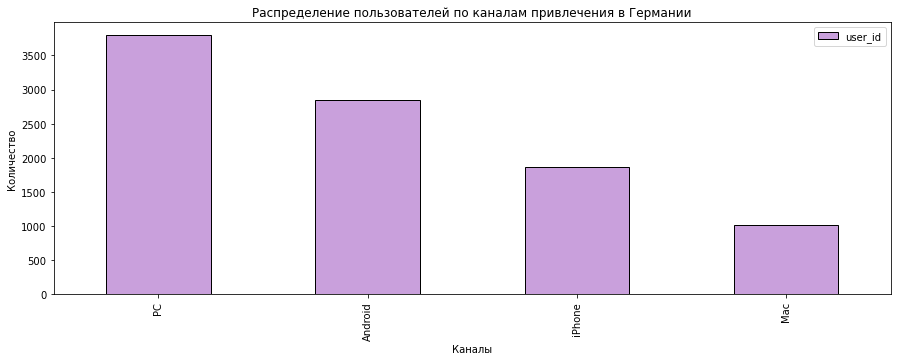

In [58]:
# Отберем данные по Германии и сделаем сводную таблицу по источникам привлечения:
profiles_Germany_device = profiles[profiles['region'] == 'Germany']
profiles_Germany_device_table =  profiles_Germany_device.pivot_table(index='device', values='user_id', 
                                                                     aggfunc='count').sort_values('user_id', 
                                                                                                  ascending = False)

# построим график для наглядности:
profiles_Germany_device_table.plot(kind='bar', title='Распределение пользователей по каналам привлечения в Германии', 
                                   ec='black', figsize = (15, 5), color = '#c9a0dc')
plt.xlabel('Каналы')
plt.ylabel('Количество');

**Франция:**

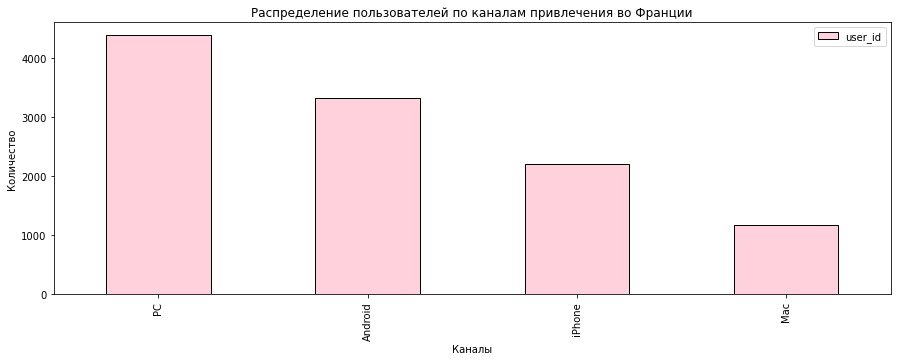

In [59]:
# Отберем данные по Франции и сделаем сводную таблицу по источникам привлечения:
profiles_France_device = profiles[profiles['region'] == 'France']
profiles_France_device_table =  profiles_France_device.pivot_table(index='device', values='user_id', 
                                                                   aggfunc='count').sort_values('user_id', ascending = False)

# построим график для наглядности:
profiles_France_device_table.plot(kind='bar', title='Распределение пользователей по каналам привлечения во Франции' , 
                                  ec='black', figsize = (15, 5), color = '#ffd1dc')
plt.xlabel('Каналы')
plt.ylabel('Количество');

**Великобритания:**

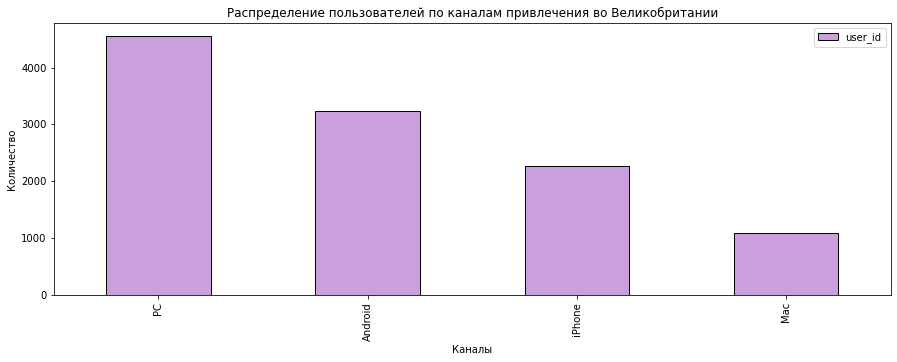

In [60]:
# Отберем данные по Великобритании и сделаем сводную таблицу по источникам привлечения:
profiles_UK_device = profiles[profiles['region'] == 'UK']
profiles_UK_device_table =  profiles_UK_device.pivot_table(index='device', values='user_id', 
                                                           aggfunc='count').sort_values('user_id', ascending = False)

# построим график для наглядности:
profiles_UK_device_table.plot(kind='bar', title='Распределение пользователей по каналам привлечения во Великобритании', 
                              ec='black', figsize = (15, 5), color = '#c9a0dc')
plt.xlabel('Каналы')
plt.ylabel('Количество');

Как я и предполагала, Айфонами и Маками пользуются, в основном, в США. В Европе пользователи отдают предпочнение ПК и Андройду. Проблема с окупаемостью по большей части в США.

### Выводы по пятой главе

**В этой главе мы поделали следующее:**

- Рассмотрели общую окупаемость рекламных затрат (затраты не окупаются);
- Рассмотрели окупаемость в разбивке по странам (выяснилось, что не окупаются затраты по одной конкретной стране - США, при этом затраты на рекламу по этой стране выше всех остальных);
- Рассмотрели окупаемость в разбивке по каналам привлечения (проблема оказалась в трех конкретных каналах привлчения: ТипТоп, ФейсБум, ЭднонСенс. В основном, в первых двух, так как это американсие каналы и привлекают гораздо больше пользователей, чем последний в Европе);
- Рассмотрели окупаемость в разбивке по устройствам (не окупаются все устройства, кроме пк. Тут также проблема, в основном, региональная, аутсайдеры - Мак и Айфоны, ими, в соновном, пользуются в США).  

## Заключение

**В ходе данной работы мы проделали следующие шаги:**

- Изучили данные и сделали предобработку для дальнейшего анализа;
- Прописали необходимые функции для получения профилей пользователей, расчета и визуализации метрик;
- Изучили распределение пользователей по странам (большая часть приходится на США);
- Изучили распределение пользователей по устройствам (по убыванию: Айфоны, Андройды, Маки, пк);
- Изучили рапределение пользователей по каналам привлечения (лидеры: ТипТоп и органический трафик);
- Посчитаны общие траты на рекламу: 105497.3 и стоимость привлеения пользователя - 0.7;
- Рассмотрели структуру трат на рекламу (в лидерах по тратам - ТипТоп, ФейсБум, ВахуНетБаннер и ЭдНонСенс. При этом траты на первые два превышает траты на все остальные источники, основной упор в маркетинге делался на них);
- Рассмотрели общие ROI и LTV, узнали, что траты на рекламу приложения не окупились;
- Рассмотрели окупаемость по регионам (США не окупается);
- Рассмотрели окупаемость по каналам привлечения (ТипТоп, ФейсБум, ЭднонСенс не окупаются);
- Рассмотрели окупаемость по устройствам (не окупаются все, кроме ПК).

**Выявленная проблема:**

В ходе работы мы установили, что проблема общей окупаемости заключается, по большей части, в окупаемости одной конкретной страны - США. Обусловлена она тем, что большая часть пользователей из США, Европейским странам при своей окупаемости не удается сильно повлиять на общий показатель. Удалось установить, что дело в двух конкретных каналах привлечения и типах устройств. Пользователи США предпочитают Айфоны и Маки, привлечение же этих пользователей идет, по большей части, из каналов ТипТоп и ФейсБум, которых нет в Европе. 

**Вероятные причины неокупаемости рекламы:**

1. Некорректно просчитанная маркетинговая кампания по продвижению в ТипТоп и Фейсбум США (на привлечение тратится больше, чем пользователи приносят компании);
2. Вероятные технические сбои/особенности работы рекламных элементов на устройствах Айфон и Мак, и прочих мобильных устройств, из-за которых пользователи меньше тратят/покупают, чем с ПК.

**Рекомендации:**

- Пересмотр маркетинговых кампаний для пользователи ТипТоп и Фейсбум США, они явно неэффективны и расточительны (в случае отсутсвия технических проблем);
- Поиск проблемы/технических особенностей работы с Маком и мобильными устройствами (рассмотреть логи об ошибках, дополнительное тестирование работы посадочных страниц/банеров/цепочки осуществления покупки и доп.продаж в приложении и тд).
- Также рекомендуется пересмотреть маркетинговые кампании в канале ЭдНонСенс в европейских странах. Он хоть и небольшой по количеству пользователей по сравнению с первыми двумя из США, но тоже не окупается, это тоже нужно исправить.